In [37]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering

le = preprocessing.LabelEncoder()


data = pd.read_csv('finaldata.csv')
#print(data)

for i in data.columns:
	data[i] = le.fit_transform(data[i])

#data = Normalizer().fit_transform(data)

times = ['Arsenal:', "Bournemouth:", 'Brighton' ,'Burnley:', 'Cardiff:', 'Chelsea:', 'Crystal Palace:', 'Everton:', "Fulham:", 'Huddersfield:', 'Leicester:', 'Liverpool:', 'Manchester City:', 'Manchester United:', 'NewCastle United:', 'Southampton:', 'Tottenham:', 'Watford:', 'West Ham:', 'Wolverhampton:' ]

#_______________________________________________________________________________

km = KMeans(n_clusters = 3, init = 'random')

km.fit(data)

clusters = km.predict(data)


#_______________________________________________________________________________


hie = AgglomerativeClustering(n_clusters = 3)

clHie = hie.fit_predict(data)

#_______________________________________________________________________________
frame = []

for i in range(len(times)):
	frame += [[times[i],clusters[i],clHie[i]]]


df = pd.DataFrame(frame, columns = ['Time', 'KMeans', 'Hierarchical'])


df


,Time,KMeans,Hierarchical
0,Arsenal:,2,0
1,Bournemouth:,1,2
2,Brighton,0,1
3,Burnley:,0,1
4,Cardiff:,0,1
5,Chelsea:,2,0
6,Crystal Palace:,1,2
7,Everton:,1,0
8,Fulham:,0,2
9,Huddersfield:,0,1


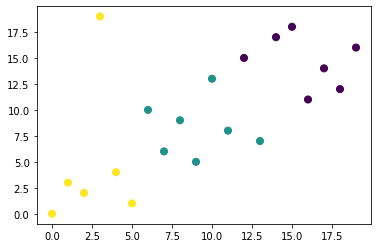

In [38]:
plt.scatter(data['general_league_position'], data['Total'], s=50, c=clusters, cmap='viridis')


# centers = km.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

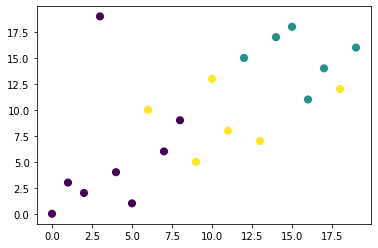

In [39]:
plt.scatter(data['general_league_position'], data['Total'], c=clHie,s = 50, cmap='viridis')

plt.show()